In [827]:
# import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [828]:
# read the dataset 
hotel_dataset=pd.read_csv("hotel_bookings.csv")
hotel_dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [829]:
hotel_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [830]:
hotel_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [831]:
#check the dataset
hotel_dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

  ### Cleaning Datd
 
 1- Missing value

    there is missing value in (children, country, agent and company)
    drop the country, agent and company and fill the children columns

 2- Change the data type for children columns to integer

 3- Change the name of columns "adr" to average_daily_rate

 4- Remove data where number of adults is 0, indicating bad data
 
 5- Remove duplicate data

In [832]:
#1
# removd because majoraty of data is missing and dosen't matter because is ID
hotel_dataset_clean = hotel_dataset.drop(columns=["company"])
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["agent"])

# dosen't important value 
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["country"])
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["days_in_waiting_list"])
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["arrival_date_year"])
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["assigned_room_type"])
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["booking_changes"])
hotel_dataset_clean = hotel_dataset_clean.drop(columns=["reservation_status"])

In [833]:
#2
hotel_dataset_clean['children'] = hotel_dataset_clean.children.fillna(hotel_dataset.children.mean())

In [834]:
hotel_dataset_clean = hotel_dataset_clean.astype({"children":'int64'})

In [835]:
#3
hotel_dataset_clean = hotel_dataset_clean.rename(columns={"adr":"average_daily_rate"})

In [836]:
#4
hotel_dataset_clean = hotel_dataset_clean[hotel_dataset_clean['adults']!=0]

In [837]:
#5
hotel_dataset_clean = hotel_dataset_clean.drop_duplicates()

In [838]:
# balance data 
g = hotel_dataset_clean.groupby('is_canceled')
hotel_dataset_clean_and_balanced = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

### Checking on the dataset after the cleaning 

In [839]:
print(f'dataset before removing duplicates: {hotel_dataset.duplicated().sum()}')
print(f'dataset after removing duplicates: {hotel_dataset_clean.duplicated().sum()}')


dataset before removing duplicates: 31994
dataset after removing duplicates: 0


In [840]:
hotel_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83261 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83261 non-null  object 
 1   is_canceled                     83261 non-null  int64  
 2   lead_time                       83261 non-null  int64  
 3   arrival_date_month              83261 non-null  object 
 4   arrival_date_week_number        83261 non-null  int64  
 5   arrival_date_day_of_month       83261 non-null  int64  
 6   stays_in_weekend_nights         83261 non-null  int64  
 7   stays_in_week_nights            83261 non-null  int64  
 8   adults                          83261 non-null  int64  
 9   children                        83261 non-null  int64  
 10  babies                          83261 non-null  int64  
 11  meal                            83261 non-null  object 
 12  market_segment                 

In [841]:
hotel_dataset_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [842]:
hotel_dataset_clean[hotel_dataset_clean['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date


In [843]:
hotel_dataset_clean.shape

(83261, 24)

In [844]:
hotel_dataset_clean_and_balanced

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,28,May,21,19,2,5,3,0,...,0,0,0,A,No Deposit,Transient,79.90,0,2,2016-05-26
1,City Hotel,0,188,July,27,7,0,1,2,0,...,0,0,0,A,No Deposit,Transient,89.10,0,0,2017-07-08
2,City Hotel,0,88,March,14,31,0,1,2,0,...,0,0,0,A,No Deposit,Transient,76.50,0,0,2016-04-01
3,City Hotel,0,121,May,21,27,2,4,2,0,...,0,0,0,A,No Deposit,Transient,89.10,0,2,2017-06-02
4,City Hotel,0,15,February,5,3,0,1,2,0,...,0,0,0,A,No Deposit,Transient-Party,99.00,0,0,2017-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47501,City Hotel,1,62,January,2,12,2,3,2,0,...,0,0,0,A,No Deposit,Transient,88.40,0,0,2016-11-12
47502,Resort Hotel,1,177,August,32,6,2,2,2,0,...,0,0,0,A,No Deposit,Transient,116.50,0,0,2017-02-10
47503,City Hotel,1,74,March,11,17,1,2,2,0,...,0,0,0,A,No Deposit,Transient,97.20,0,0,2017-01-07
47504,City Hotel,1,195,August,33,7,2,1,2,0,...,0,0,0,A,No Deposit,Transient,99.00,0,1,2016-04-22


### EDA

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

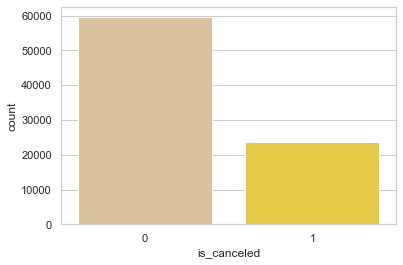

In [845]:
sns.set_theme(style="whitegrid", palette="Set2_r") #cubehelix_r #CMRmap_r
sns.countplot(x="is_canceled" ,data=hotel_dataset_clean)

This chart shows there is unbalance between in the dataset so, in preprocessing part I will balance between them 

In [846]:
hotel_dataset.is_canceled.value_counts()/ len(hotel_dataset)*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

In [847]:
hotel_dataset_clean.is_canceled.value_counts()/ len(hotel_dataset_clean)*100

0    71.471637
1    28.528363
Name: is_canceled, dtype: float64

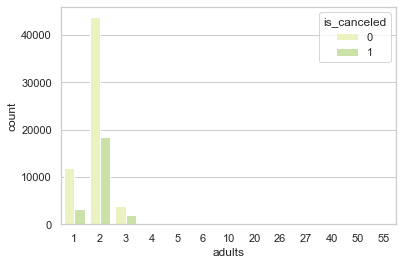

In [848]:
sns.set_theme(style="whitegrid", palette="YlGn")
sns.countplot(x="adults", data=hotel_dataset_clean, hue="is_canceled") 
plt.legend(loc='upper right', title='is_canceled')

<AxesSubplot:xlabel='total_of_special_requests', ylabel='Count'>

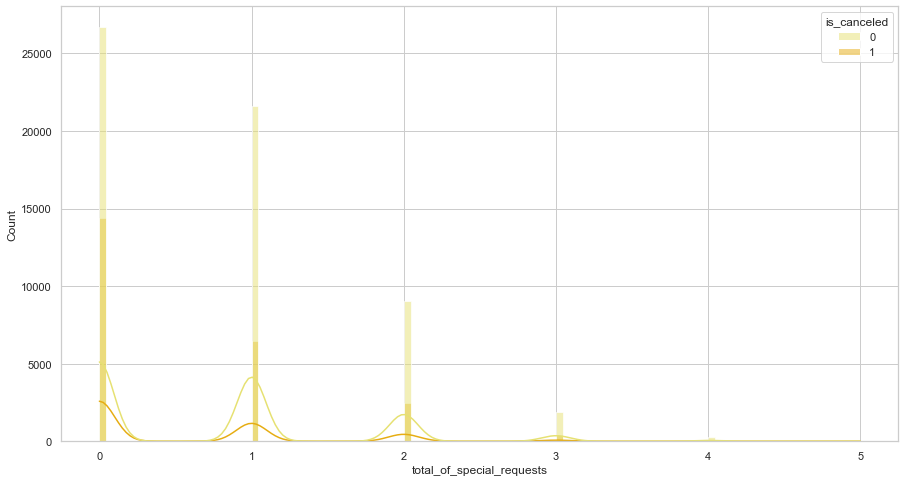

In [849]:
%matplotlib inline
sns.set_theme(style="whitegrid", palette="CMRmap_r")#Spectral
figure= plt.figure(figsize=(15,8))
sns.histplot(x="total_of_special_requests", data=hotel_dataset_clean, hue="is_canceled",kde=True)

<AxesSubplot:xlabel='is_canceled', ylabel='hotel'>

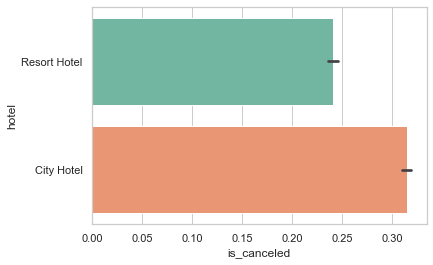

In [850]:
sns.set_theme(style="whitegrid", palette="Set2") #cubehelix_r
sns.barplot(y="hotel", data=hotel_dataset_clean, x="is_canceled")

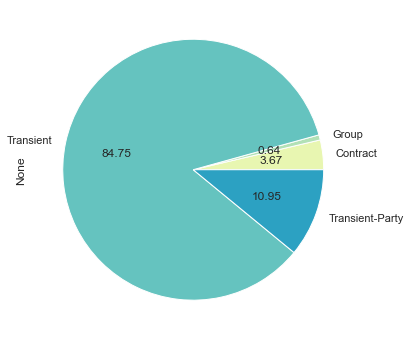

In [851]:
figure= plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid", palette="YlGnBu")
hotel_dataset_clean.groupby("customer_type").size().plot(kind="pie",autopct="%.2f");

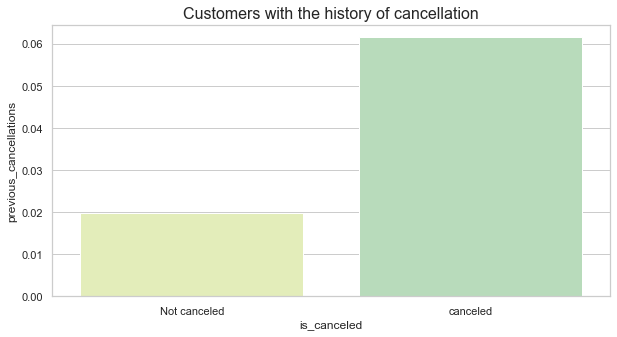

In [852]:
ngroup= hotel_dataset_clean.groupby('is_canceled', as_index= False)[['previous_cancellations']].mean()
#sns.set_theme(style="whitegrid", palette="CMRmap_r")
plt.figure(figsize=(10,5))
plt.title("Customers with the history of cancellation",fontsize=16)
history_of_cancellation=sns.barplot(data=ngroup, x=ngroup['is_canceled'], y=ngroup['previous_cancellations'])
history_of_cancellation.set_xticklabels(['Not canceled','canceled']);

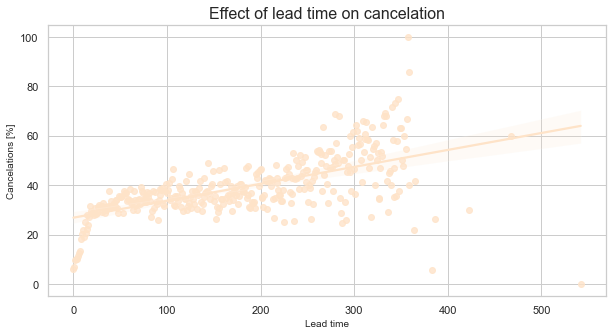

In [853]:
# group data for lead_time:
lead_cancel_data = hotel_dataset_clean.groupby("lead_time")["is_canceled"].describe()

# use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
sns.set_theme(style="whitegrid", palette="Oranges")
plt.figure(figsize=(10,5))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time",fontsize=10)
plt.ylabel("Cancelations [%]", fontsize=10)
# plt.xlim(0,365)
plt.show()

#### After balancing 

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

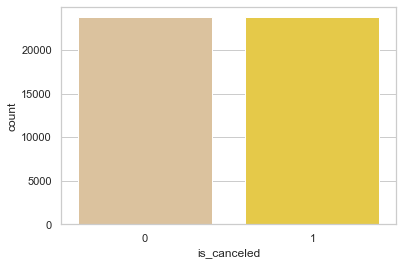

In [854]:
sns.set_theme(style="whitegrid", palette="Set2_r")
sns.countplot(x="is_canceled" ,data=hotel_dataset_clean_and_balanced)

In [855]:
hotel_dataset_clean_and_balanced.is_canceled.value_counts()/ len(hotel_dataset_clean_and_balanced)*100

0    50.0
1    50.0
Name: is_canceled, dtype: float64

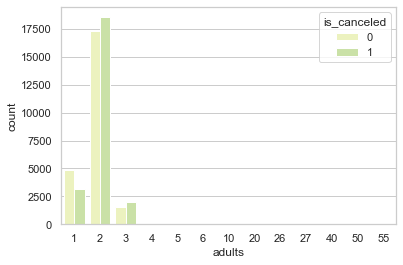

In [856]:
sns.set_theme(style="whitegrid", palette="YlGn")
sns.countplot(x="adults", data=hotel_dataset_clean_and_balanced, hue="is_canceled")
plt.legend(loc='upper right', title='is_canceled')

When the number of adults 2 is often tend to cancel the booking, Whereas when one person doesn't tend to cancel.  

<AxesSubplot:xlabel='total_of_special_requests', ylabel='Count'>

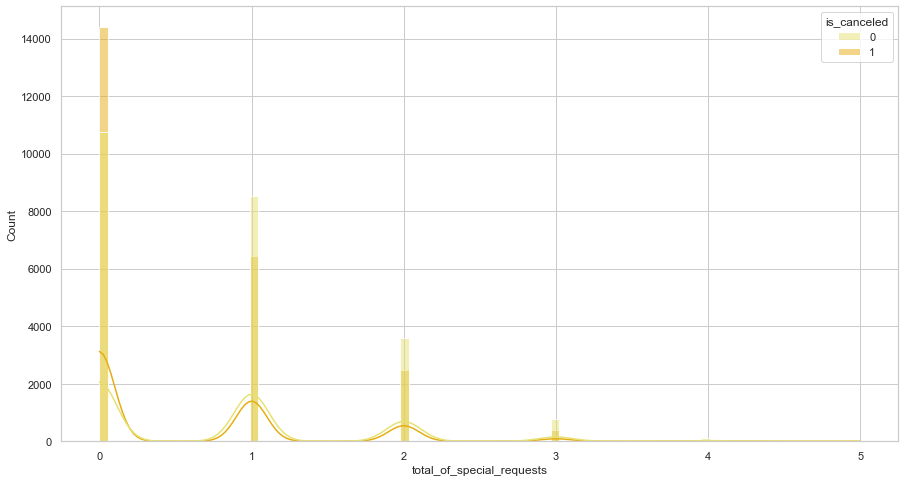

In [857]:
%matplotlib inline
sns.set_theme(style="whitegrid", palette="CMRmap_r")
figure= plt.figure(figsize=(15,8))
sns.histplot(x="total_of_special_requests", data=hotel_dataset_clean_and_balanced, hue="is_canceled",kde=True)

Customers who don't have special requests are the highest, but they often tend to cancel, while those with special requests often don't tend to cancel.

<AxesSubplot:xlabel='is_canceled', ylabel='hotel'>

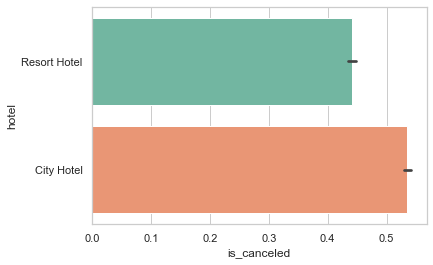

In [858]:
sns.set_theme(style="whitegrid", palette="Set2")
sns.barplot(y="hotel", data=hotel_dataset_clean_and_balanced, x="is_canceled")

Customers in the City Hotel tend to cancel more often.


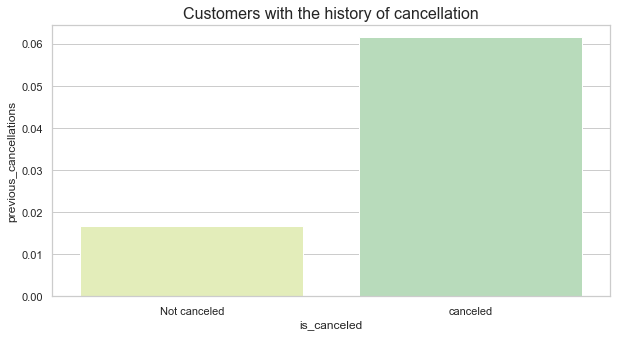

In [782]:
ngroup= hotel_dataset_clean_and_balanced.groupby('is_canceled', as_index= False)[['previous_cancellations']].mean()
sns.set_theme(style="whitegrid", palette="YlGnBu")
plt.figure(figsize=(10,5))
plt.title("Customers with the history of cancellation",fontsize=16)
history_of_cancellation=sns.barplot(data=ngroup, x=ngroup['is_canceled'], y=ngroup['previous_cancellations'])
history_of_cancellation.set_xticklabels(['Not canceled','canceled']);

Customers with the history of cancellation tend to cancel more often.
Interestingly repeated guests tend to cancel more

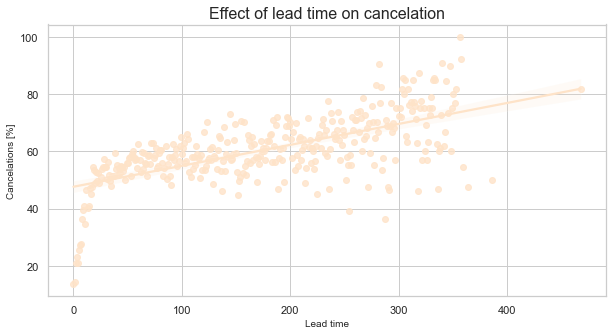

In [892]:
# group data for lead_time:
lead_cancel_data = hotel_dataset_clean_and_balanced.groupby("lead_time")["is_canceled"].describe()

# use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
sns.set_theme(style="whitegrid", palette="Oranges")
plt.figure(figsize=(10,5))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time",fontsize=10)
plt.ylabel("Cancelations [%]", fontsize=10)
# plt.xlim(0,365)
plt.show()

Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

### Preprocessing 

In [784]:
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['hotel'] == 'Resort Hotel', 'hotel'] = 0
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['hotel'] == 'City Hotel', 'hotel'] = 1

In [785]:
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'January', 'arrival_date_month'] = 1
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'February', 'arrival_date_month'] = 2
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'March', 'arrival_date_month'] = 3
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'April', 'arrival_date_month'] = 4
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'May', 'arrival_date_month'] = 5
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'June', 'arrival_date_month'] = 6
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'July', 'arrival_date_month'] = 7
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'August', 'arrival_date_month'] = 8
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'September', 'arrival_date_month'] = 9
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'October', 'arrival_date_month'] = 10
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'November', 'arrival_date_month'] = 11
hotel_dataset_clean_and_balanced.loc[hotel_dataset_clean_and_balanced['arrival_date_month'] == 'December', 'arrival_date_month'] = 12

In [786]:
hotel_dataset_clean_and_balanced = hotel_dataset_clean_and_balanced.astype({'arrival_date_month':'int64'})

In [787]:
def cnvt_date_to_num(x):
  return int(x.day*(10**6) + x.month*(10**4) + x.year)

# Apply the above function to both reservation_status_date and arrival_date
hotel_dataset_clean_and_balanced['reservation_status_date'] = pd.to_datetime(hotel_dataset_clean_and_balanced['reservation_status_date']).apply(lambda x : cnvt_date_to_num(x))
#hotel_dataset_clean_and_balanced['arrival_date'] = hotel_dataset_clean_and_balanced['arrival_date'].apply(lambda x : cnvt_date_to_num(x))

In [788]:
hotel_dataset_clean_and_balanced = hotel_dataset_clean_and_balanced.astype({'reservation_status_date':'int64'})

In [789]:
hotel_dataset_clean_and_balanced

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,0,336,9,38,15,0,3,2,0,...,0,0,0,A,No Deposit,Transient-Party,66.00,0,1,18092016
1,1,0,0,10,41,6,0,1,2,0,...,0,0,0,A,No Deposit,Contract,114.00,0,2,7102015
2,0,0,270,5,21,21,2,5,2,0,...,0,0,0,D,No Deposit,Contract,52.85,0,0,28052017
3,1,0,0,1,2,8,0,1,2,0,...,0,0,0,A,No Deposit,Transient,67.50,0,0,9012016
4,0,0,13,12,50,6,1,5,1,0,...,0,0,0,E,No Deposit,Transient,50.00,0,0,12122016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47501,1,1,88,5,19,2,1,2,2,0,...,0,0,0,A,No Deposit,Transient,116.10,0,0,10042016
47502,1,1,142,10,44,27,0,1,2,0,...,0,0,0,A,No Deposit,Transient,90.90,0,1,24102016
47503,0,1,63,5,23,31,0,5,2,0,...,0,0,0,A,No Deposit,Transient,105.80,0,1,13052016
47504,0,1,11,3,13,24,0,1,2,0,...,0,0,0,A,No Deposit,Transient,85.00,0,1,24032016


In [790]:
hotel_dataset_clean_and_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47506 entries, 0 to 47505
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           47506 non-null  object 
 1   is_canceled                     47506 non-null  int64  
 2   lead_time                       47506 non-null  int64  
 3   arrival_date_month              47506 non-null  int64  
 4   arrival_date_week_number        47506 non-null  int64  
 5   arrival_date_day_of_month       47506 non-null  int64  
 6   stays_in_weekend_nights         47506 non-null  int64  
 7   stays_in_week_nights            47506 non-null  int64  
 8   adults                          47506 non-null  int64  
 9   children                        47506 non-null  int64  
 10  babies                          47506 non-null  int64  
 11  meal                            47506 non-null  object 
 12  market_segment                  

In [791]:
hotel_dataset_clean_and_balanced=pd.get_dummies(hotel_dataset_clean_and_balanced, drop_first=True)

In [792]:
hotel_dataset_clean_and_balanced.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,336,9,38,15,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,10,41,6,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,270,5,21,21,2,5,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,8,0,1,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,13,12,50,6,1,5,1,0,0,...,1,0,0,0,0,0,0,0,1,0


### Modelling 

In [793]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import roc_auc_score, roc_curve

In [794]:
#Logistic Regration Model
X = hotel_dataset_clean_and_balanced.drop(columns=['is_canceled'])
y = hotel_dataset_clean_and_balanced['is_canceled']

In [795]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [796]:
X_train

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
42031,32,9,39,24,1,1,2,2,0,0,...,0,1,0,0,0,0,0,0,1,0
16051,47,8,36,31,2,5,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13198,183,8,33,17,2,4,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2041,22,7,29,20,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
44836,178,6,23,9,0,2,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,34,10,44,25,2,3,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
44732,157,8,31,3,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38158,0,5,20,9,1,0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
860,42,4,17,21,1,3,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [797]:
y_train

42031    1
16051    0
13198    0
2041     0
44836    1
        ..
11284    0
44732    1
38158    1
860      0
15795    0
Name: is_canceled, Length: 33254, dtype: int64

#### Logistic Regression

In [798]:
model = LogisticRegression(solver='liblinear')

In [799]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [800]:
pred=model.predict(X_test)

In [801]:
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [802]:
print("Logistic score: {:6.4f}".format(model.score(X_train,y_train)))

Logistic score: 0.5836


In [803]:
print('The logistic regression model accuracy score was {}% on test dataset'.format(round(accuracy_score(y_test,pred)*100)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, pred), 
                                                     recall_score(y_test,pred)))

The logistic regression model accuracy score was 58% on test dataset
Precision: 0.5722,   Recall: 0.6547


In [804]:
>>> clf = model
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores

array([0.58798148, 0.59067467, 0.58678034, 0.60014735, 0.58793811])

In [805]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.59 accuracy with a standard deviation of 0.00


In [806]:
print("Logistic Model confusion matrix: \n\n", confusion_matrix(y_test, pred)) #model.predict(X_test)))

Logistic Model confusion matrix: 

 [[3657 3482]
 [2456 4657]]


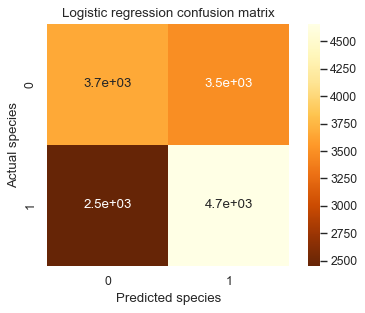

In [879]:
logit_confusion = confusion_matrix(y_test, model.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(logit_confusion, cmap=plt.cm.YlOrBr_r, annot=True, square=True)
#, YlOrBr sns.heatmap(logit_confusion, cmap=plt.cm.cubehelix_r, annot=True, square=True)
           #xticklabels=hotel_dataset['is_canceled'],
           #yticklabels=hotel_dataset['is_canceled'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_iris")

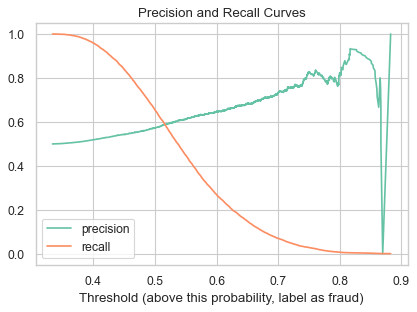

In [880]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

ROC AUC score =  0.6239980667867973


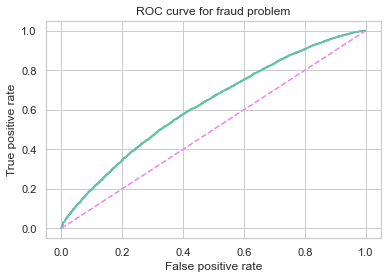

In [881]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

#### Decision Tree Model 

In [882]:
from sklearn.tree import DecisionTreeClassifier

In [811]:
dt_model = DecisionTreeClassifier()

In [812]:
dt_model.fit(X_train,y_train )

DecisionTreeClassifier()

In [890]:
dt_y_pred = dt_model.predict(X_test)

print('The decision Tree model accuracy score was {}% on test dataset'.format(round(accuracy_score(y_test,dt_y_pred)*100)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format (precision_score(y_test, dt_y_pred), 
                                                   recall_score(y_test,dt_y_pred)))

The decision Tree model accuracy score was 78% on test dataset
Precision: 0.7834,   Recall: 0.7720


In [891]:
print("Random Forest model confusion matrix: \n\n", confusion_matrix(y_test,dt_y_pred))#model.predict(X_test)))

Random Forest model confusion matrix: 

 [[5621 1518]
 [1622 5491]]


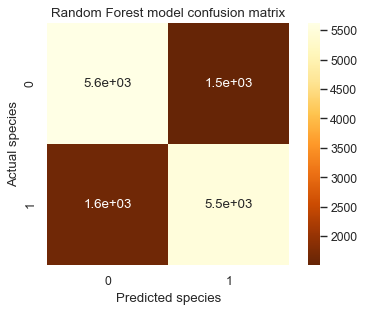

In [884]:
Ran_confusion = confusion_matrix(y_test, dt_model.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(Ran_confusion, cmap=plt.cm.YlOrBr_r, annot=True, square=True)
#,
           #xticklabels=hotel_dataset['is_canceled'],
           #yticklabels=hotel_dataset['is_canceled'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Random Forest model confusion matrix');

plt.savefig("confusion_matrix_Random_iris")

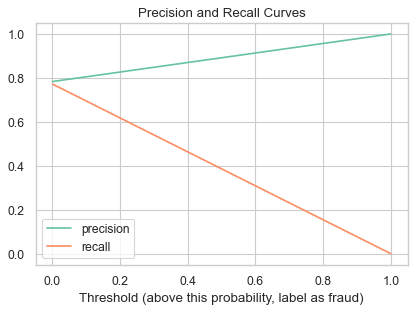

In [885]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, dt_model.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

ROC AUC score =  0.6239980667867973


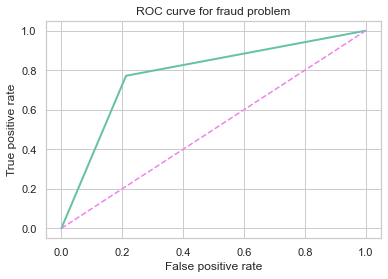

In [886]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

#### Random Forest Model 

In [893]:
from sklearn.ensemble import RandomForestClassifier
#rnf_model=RandomForestClassifier() 
rf_model = RandomForestClassifier(max_features=8).fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
print('The Random Forest model accuracy score was {}% on test dataset'.format(round(accuracy_score(rf_y_pred, y_test)*100)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, rf_y_pred), 
                                                     recall_score(y_test,rf_y_pred)))

The Random Forest model accuracy score was 83% on test dataset
Precision: 0.8366,   Recall: 0.8213


In [820]:
>>> clf = rf_model
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores

array([0.8298253 , 0.84422692, 0.83180718, 0.83370172, 0.83485949])

In [821]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.00


In [822]:
print("Random Forest model confusion matrix: \n\n", confusion_matrix(y_test, rf_y_pred))#model.predict(X_test)))

Random Forest model confusion matrix: 

 [[5992 1147]
 [1300 5813]]


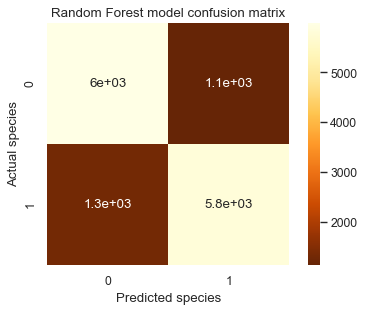

In [887]:
Ran_confusion = confusion_matrix(y_test, rf_model.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(Ran_confusion, cmap=plt.cm.YlOrBr_r, annot=True, square=True)
#,
           #xticklabels=hotel_dataset['is_canceled'],
           #yticklabels=hotel_dataset['is_canceled'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Random Forest model confusion matrix');

plt.savefig("confusion_matrix_Random_iris")

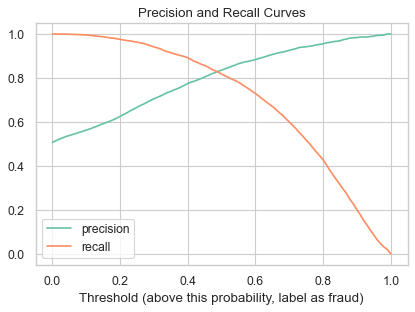

In [888]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

ROC AUC score =  0.6239980667867973


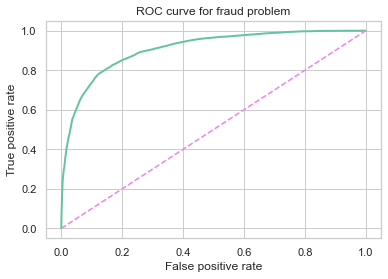

In [889]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))